In [1]:
import numpy as np #для матричных вычислений
import pandas as pd #для анализа и предобработки данных
import matplotlib.pyplot as plt #для визуализации
import seaborn as sns #для визуализации

from sklearn import linear_model #линейные модели
from sklearn import metrics #метрики
from sklearn import preprocessing # полиномиальные признаки
from sklearn.model_selection import train_test_split #сплитование выборки
%matplotlib inline
plt.style.use('seaborn-v0_8')

Этапы CRISP-DM
1. Анализ требований
2. Исследование данных
3. Подготовка данных
4. Моделирование
5. Оценка моедли

#### 1. Анализ требований
(ошибка модели +/- 2000 $)

In [2]:
# загрузка данных
audi_data = pd.read_csv('data/audi.csv')
audi_data.head()

,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize
0,A1,2017,12500,Manual,15735,Petrol,150,55.4,1.4
1,A6,2016,16500,Automatic,36203,Diesel,20,64.2,2.0
2,A1,2016,11000,Manual,29946,Petrol,30,55.4,1.4
3,A4,2017,16800,Automatic,25952,Diesel,145,67.3,2.0
4,A3,2019,17300,Manual,1998,Petrol,145,49.6,1.0


In [3]:
# размерность таблицы
audi_data.shape

(10668, 9)

In [4]:
# информация о дата-сете
audi_data.info()

# пропуски отсутствуют
# три категориальных признака

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10668 entries, 0 to 10667
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   model         10668 non-null  object 
 1   year          10668 non-null  int64  
 2   price         10668 non-null  int64  
 3   transmission  10668 non-null  object 
 4   mileage       10668 non-null  int64  
 5   fuelType      10668 non-null  object 
 6   tax           10668 non-null  int64  
 7   mpg           10668 non-null  float64
 8   engineSize    10668 non-null  float64
dtypes: float64(2), int64(4), object(3)
memory usage: 750.2+ KB


### Итерация №1

#### 2. Исследование данных

In [5]:
# статистические данные
audi_data.describe()

,year,price,mileage,tax,mpg,engineSize
count,10668.000000,10668.000000,10668.000000,10668.000000,10668.000000,10668.000000
mean,2017.100675,22896.685039,24827.244001,126.011436,50.770022,1.930709
std,2.167494,11714.841888,23505.257205,67.170294,12.949782,0.602957
min,1997.000000,1490.000000,1.000000,0.000000,18.900000,0.000000
25%,2016.000000,15130.750000,5968.750000,125.000000,40.900000,1.500000
50%,2017.000000,20200.000000,19000.000000,145.000000,49.600000,2.000000
75%,2019.000000,27990.000000,36464.500000,145.000000,58.900000,2.000000
max,2020.000000,145000.000000,323000.000000,580.000000,188.300000,6.300000


In [6]:
# статистические данные категориальных признаков
audi_data.describe(include='object')

,model,transmission,fuelType
count,10668,10668,10668
unique,26,3,3
top,A3,Manual,Diesel
freq,1929,4369,5577


In [7]:
# создадим копию дата-сета
temp_data = audi_data.copy()

# создадим список числовых признаков
types = temp_data.dtypes
new_features = list(types[(types != 'object')].index)
new_features

['year', 'price', 'mileage', 'tax', 'mpg', 'engineSize']

Для каждого числового признака построим слева - гистограмма распрееления признака, справа - диаграмма рассеения с прямой "числовой регрессии", построинный с помощью МНК

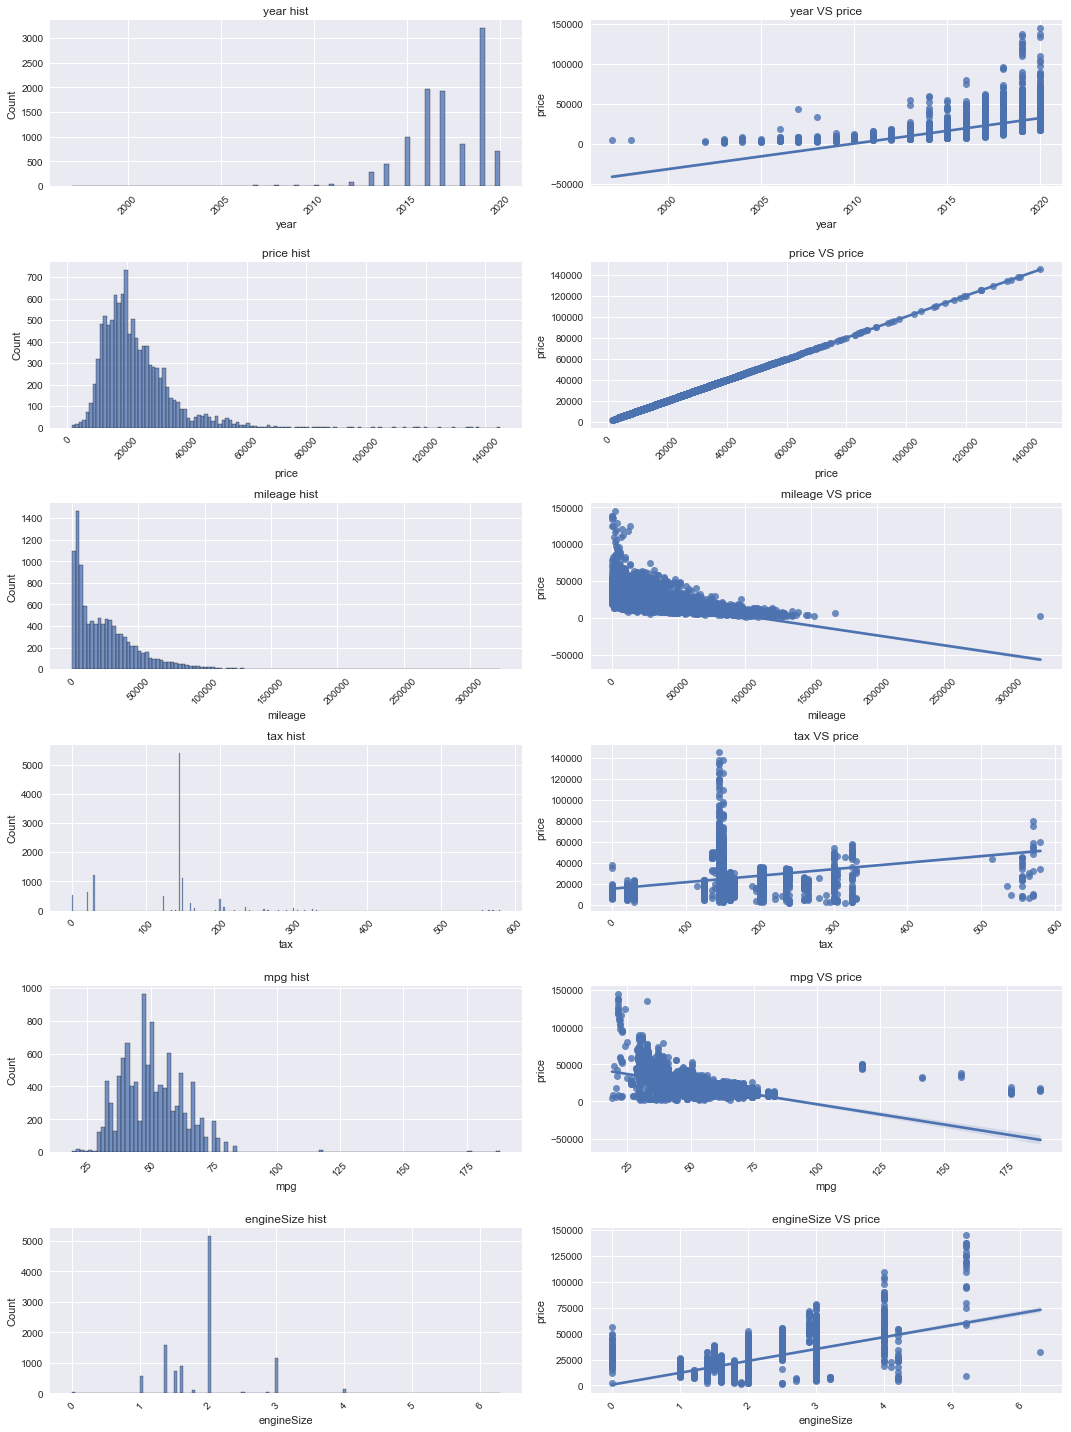

In [8]:
n = len(new_features)

fig, axes = plt.subplots(n, 2, figsize=(15,20))
for i, feature in enumerate (new_features):
    histplot = sns.histplot(data=temp_data, x=feature, ax=axes[i][0])
    histplot.set_title(f'{feature} hist')
    histplot.xaxis.set_tick_params(rotation=45)
    regplot = sns.regplot(data=temp_data, x=feature, y='price', ax=axes[i][1])
    regplot.set_title(f'{feature} VS price')
    regplot.xaxis.set_tick_params(rotation=45)
    
plt.tight_layout()

Выведем корреляцию признаков. Если корреляция хорошая, то и ленейная регрессия покажет себя также хорошо.

<Axes: >

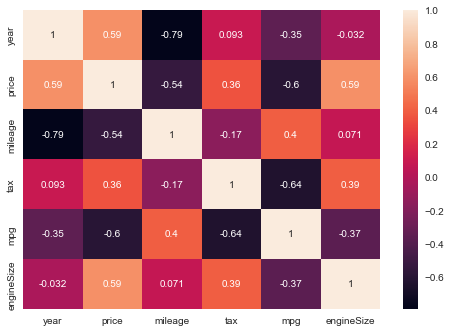

In [9]:
#fig = plt.figure(figsize = (12, 5))
heatmap = sns.heatmap(temp_data.corr(), annot=True,)
display(heatmap)
#plt.show()

#### 3. Подготовка данных

In [10]:
# горячее кодирование категориальных признаков
dummies_data = pd.get_dummies(temp_data)
dummies_data.head()

,year,price,mileage,tax,mpg,engineSize,model_ A1,model_ A2,model_ A3,model_ A4,...,model_ S8,model_ SQ5,model_ SQ7,model_ TT,transmission_Automatic,transmission_Manual,transmission_Semi-Auto,fuelType_Diesel,fuelType_Hybrid,fuelType_Petrol
0,2017,12500,15735,150,55.4,1.4,1,0,0,0,...,0,0,0,0,0,1,0,0,0,1
1,2016,16500,36203,20,64.2,2.0,0,0,0,0,...,0,0,0,0,1,0,0,1,0,0
2,2016,11000,29946,30,55.4,1.4,1,0,0,0,...,0,0,0,0,0,1,0,0,0,1
3,2017,16800,25952,145,67.3,2.0,0,0,0,1,...,0,0,0,0,1,0,0,1,0,0
4,2019,17300,1998,145,49.6,1.0,0,0,1,0,...,0,0,0,0,0,1,0,0,0,1


In [11]:
# отделяем матрицу наблюдений и вектор правильных ответов
X = dummies_data.drop('price', axis=1)
y = dummies_data['price']

In [12]:
# делим матрицу на тестовую и тренировочную выборки
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=40)
print(f'Train shape: {X_train.shape}')
print(f'Test shape: {X_test.shape}')

Train shape: (8534, 37)
Test shape: (2134, 37)


#### 4. Моделирование

In [13]:
# функция для подсчета метрик R^2, MAE, MAPE для тренировочной и тестовой выборок

def print_metrics(y_train, y_train_predict, y_test, y_test_predict):
    print(f'Train R^2: {metrics.r2_score(y_train, y_train_predict):.3f}')
    print(f'Train MAE: {metrics.mean_absolute_error(y_train, y_train_predict):.3f}')
    print(f'Train MAPE: {(metrics.mean_absolute_percentage_error(y_train, y_train_predict)*100):.3f}')
    print('\n')
    print(f'Test R^2: {metrics.r2_score(y_test, y_test_predict):.3f}')
    print(f'Test MAE: {(metrics.mean_absolute_error(y_test, y_test_predict)):.3f}')
    print(f'Testt MAPE: {(metrics.mean_absolute_percentage_error(y_test, y_test_predict)*100):.3f}')

Модель линейной регрессии

Аналитическое решение: МНК

In [14]:
lr = linear_model.LinearRegression()
lr.fit(X_train, y_train)
y_train_pred = lr.predict(X_train)
y_test_pred = lr.predict(X_test)

print_metrics(y_train, y_train_pred, y_test, y_test_pred)

Train R^2: 0.893
Train MAE: 2550.204
Train MAPE: 13.383


Test R^2: 0.887
Test MAE: 2613.726
Testt MAPE: 12.876


Численное решение: метод градиентного спуска

In [15]:
# производим скалирование данных (стандартизация/нормализация)
scaler = preprocessing.MinMaxScaler() #стандартизация/нормализация
scaler.fit(X_train) # обучение на тренировочной выборке
X_train_scaled = scaler.transform(X_train) # трансформирование тренировочной выборки
X_test_scaled = scaler.transform(X_test) # трансформирование тестовой выборки

# подача трансформированных данных в модель SGD
sgd_lr = linear_model.SGDRegressor(random_state=42)
sgd_lr.fit(X_train_scaled, y_train)
y_train_pred = sgd_lr.predict(X_train_scaled)
y_test_pred = sgd_lr.predict(X_test_scaled)

print_metrics(y_train, y_train_pred, y_test, y_test_pred)

Train R^2: 0.888
Train MAE: 2566.030
Train MAPE: 13.819


Test R^2: 0.884
Test MAE: 2601.702
Testt MAPE: 12.876


### Итерация №2

Будем строить модель на прологорифмированных данных

#### 2. Исследование данных

Логарифмируем признак цена - $price$

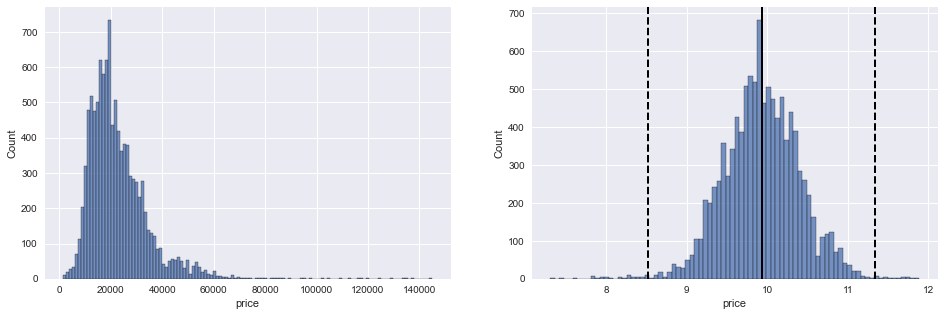

In [16]:
# построим два графика по признаку цены: 1-цена как есть и 2-логорифмированная цена

fig, axes = plt.subplots(1, 2, figsize=(16, 5))
sns.histplot(data=temp_data, x='price', ax=axes[0]);

log_price = np.log(temp_data['price']) # логорифмируем price

sns.histplot(data=log_price, ax=axes[1]);
axes[1].axvline(log_price.mean(), color='k', lw=2) # строим линию по средней цены
axes[1].axvline(log_price.mean()+3 *log_price.std(), color='k', ls='--', lw=2) # строим квартиль 75% по методу 3-х сигм
axes[1].axvline(log_price.mean()-3 *log_price.std(), color='k', ls='--', lw=2) # строим квартиль 25% по методу 3-х сигм

Получаем нормальное распределение и метод 3-х сигм обознчил выбросы

Логарифмируем признак пробег - $mileage$

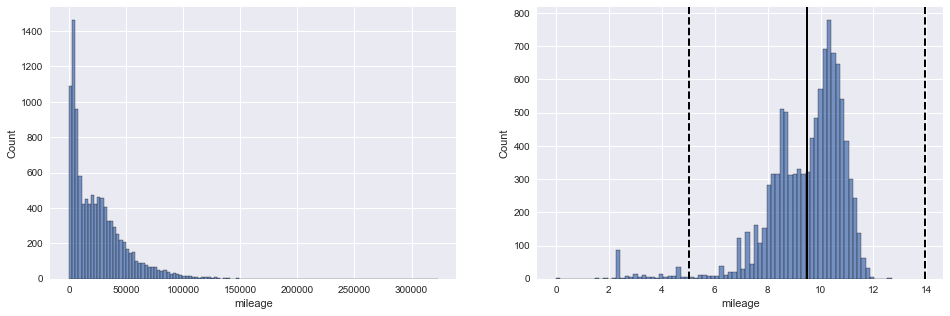

In [17]:
# построим два графика по признаку mileage: 1-пробег как есть и 2-логорифмированный пробег

fig, axes = plt.subplots(1, 2, figsize=(16, 5))
sns.histplot(data=temp_data, x='mileage', ax=axes[0]);

log_mileage = np.log(temp_data['mileage']) # логорифмируем mileage

sns.histplot(data=log_mileage, ax=axes[1]);
axes[1].axvline(log_mileage.mean(), color='k', lw=2) # строим линию по средней mieage
axes[1].axvline(log_mileage.mean()+3 *log_mileage.std(), color='k', ls='--', lw=2) # строим квартиль 75% по методу 3-х сигм
axes[1].axvline(log_mileage.mean()-3 *log_mileage.std(), color='k', ls='--', lw=2) # строим квартиль 25% по методу 3-х сигм

Логарифмируем признак расход топлива - $mpg$

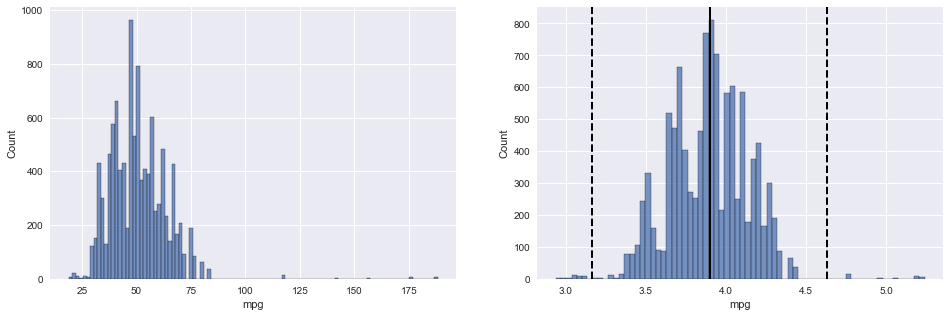

In [18]:
# построим два графика по признаку mpg: 1-пробег как есть и 2-логорифмированный пробег

fig, axes = plt.subplots(1, 2, figsize=(16, 5))
sns.histplot(data=temp_data, x='mpg', ax=axes[0]);

log_mpg = np.log(temp_data['mpg']) # логорифмируем mileage

sns.histplot(data=log_mpg, ax=axes[1]);
axes[1].axvline(log_mpg.mean(), color='k', lw=2) # строим линию по средней mieage
axes[1].axvline(log_mpg.mean()+3 *log_mpg.std(), color='k', ls='--', lw=2) # строим квартиль 75% по методу 3-х сигм
axes[1].axvline(log_mpg.mean()-3 *log_mpg.std(), color='k', ls='--', lw=2) # строим квартиль 25% по методу 3-х сигм

#### 3. Подготовка данных

Функция z-оклонения (метод трёх сигм)

In [19]:
def outliers_z_score (data, feature, log_scale=False): # подаем дата-сет и признак,который необходимо очистить от выбросов
    # логорифмическое масштабирование по умолчанию отключено
    if log_scale:
        x = np.log(data[feature]+1)
    else:
        x = data[feature]
    mu = x.mean()
    sigma = x.std()
    lower_bound = mu - 3 * sigma
    upper_bound = mu + 3 * sigma
    outliers = data[(x < lower_bound) | (x > upper_bound)]
    cleaned = data[(x > lower_bound) & (x < upper_bound)]
    return outliers, cleaned


In [20]:
# убираем выбросы в следующем порядке: цена, пробег, расход топлива
outliers, temp_cleaned = outliers_z_score(temp_data, 'price', log_scale=True) #включаем логорифмическое масштабирование
outliers, temp_cleaned = outliers_z_score(temp_cleaned, 'mileage', log_scale=True)
outliers, temp_cleaned = outliers_z_score(temp_cleaned, 'mpg', log_scale=True)

print(f'Shape before cleaning outliers: {temp_data.shape}')
print(f'Shape after cleaning outliers: {temp_cleaned.shape}')


Shape before cleaning outliers: (10668, 9)
Shape after cleaning outliers: (10308, 9)


Удалили около 300 строчек Данное количество не повлияет на качество

In [21]:
# производит горячее кодирование
dummies_data = pd.get_dummies(temp_cleaned)
dummies_data.head(3)

,year,price,mileage,tax,mpg,engineSize,model_ A1,model_ A3,model_ A4,model_ A5,...,model_ S5,model_ S8,model_ SQ5,model_ SQ7,model_ TT,transmission_Automatic,transmission_Manual,transmission_Semi-Auto,fuelType_Diesel,fuelType_Petrol
0,2017,12500,15735,150,55.4,1.4,1,0,0,0,...,0,0,0,0,0,0,1,0,0,1
1,2016,16500,36203,20,64.2,2.0,0,0,0,0,...,0,0,0,0,0,1,0,0,1,0
2,2016,11000,29946,30,55.4,1.4,1,0,0,0,...,0,0,0,0,0,0,1,0,0,1


In [22]:
# отделяем матрицу наблюдений и вектор правильных ответов
X = dummies_data.drop('price', axis=1)
y = dummies_data['price']

In [23]:
# делим матрицу на тестовую и тренировочную выборки
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=40)
print(f'Train shape: {X_train.shape}')
print(f'Test shape: {X_test.shape}')

Train shape: (8246, 35)
Test shape: (2062, 35)


#### 4. Моделирование

In [24]:
# логорифмируем правильные ответы на тренировочной выборке
y_train_log = np.log(y_train)

#обучаем модель
lr = linear_model.LinearRegression()
lr.fit(X_train, y_train_log)

y_train_pred = np.exp(lr.predict(X_train)) # вычисляем целевой признак и обратной логорифму функцией через экспоненту преобразуем
y_test_pred = np.exp(lr.predict(X_test))

# выводим метрики
print_metrics(y_train, y_train_pred, y_test, y_test_pred)

Train R^2: 0.927
Train MAE: 1959.201
Train MAPE: 8.712


Test R^2: 0.917
Test MAE: 2060.712
Testt MAPE: 9.061


Качество модели повысилось после удаления выбросов (три сигмы) и логорифмирование правильного вектора ответов

Далее создадим полимилиальные признаки

In [25]:
# нормализуем признаки
scaler = preprocessing.MinMaxScaler()
scaler.fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Создаем полимилиальные признаки
poly= preprocessing.PolynomialFeatures(degree=2, include_bias=False) # поином второй степени
poly.fit(X_train_scaled)
X_train_scaled_poly = poly.transform(X_train_scaled)
X_test_scaled_poly = poly.transform(X_test_scaled)

# возвращаем размеры тестовой и тренировочной выборок
print(f'Train shape: {X_train_scaled_poly.shape}')
print(f'Test shape: {X_test_scaled_poly.shape}')

Train shape: (8246, 665)
Test shape: (2062, 665)


In [ ]:
'''
# обучим модель на логорифмированных данных
lr_poly = linear_model.LinearRegression()
lr_poly.fit(X_train_scaled_poly, y_train_log)

# применяем модель на нормализованных и полимилиальных признаках и не забываем экспоненту, т.к. целевой признак на тренировке логорифмирован
y_train_pred = np.exp(lr_poly.predict(X_train_scaled_poly))
y_test_pred = np.exp(lr_poly.predict(X_test_scaled_poly))

# выводим метрики
print_metrics(y_train, y_train_pred, y_test, y_test_pred)

# привыполнении видим ошибки т.к. коефф большие - 10 степень и т.д. и это еще для логорифма, возвести в экспоненту и получатся бльшие числа
# lr_poly.coef_
# модель не стабильна и переучена, необходима регуляризация
'''

Регуляризация модели L2

In [27]:
# производим реуляризацию L2
ridge_lr_poly = linear_model.Ridge()
ridge_lr_poly.fit(X_train_scaled_poly, y_train_log) # подаем логорифмированный тестовый вектор

# осуществляем предсказание, не забываем экспоненту
y_train_pred = np.exp(ridge_lr_poly.predict(X_train_scaled_poly))
y_test_pred = np.exp(ridge_lr_poly.predict(X_test_scaled_poly))

# выводим метрики
print_metrics(y_train, y_train_pred, y_test, y_test_pred)

Train R^2: 0.946
Train MAE: 1714.759
Train MAPE: 7.798


Test R^2: 0.934
Test MAE: 1826.895
Testt MAPE: 8.184


Регуляризация $"a"$, подбор пареметров

In [28]:
# Создадим списко из 20 возможных значений от 0,01 до 1
alpha_list = np.linspace(0.01, 10, 20)

# создадим пустые списки, в которые будем добавлять рузельтаты
train_score = []
test_score = []

for alpha in alpha_list:
    # создадим собъект класса линейной регрессии с L1-регуляризацией
    ridge_lr_poly = linear_model.Ridge(alpha=alpha, max_iter=10000)
    
    # обучаем модель по МНК
    ridge_lr_poly.fit(X_train_scaled_poly, y_train)
    #делаем предсказание на тернировочной выборке
    y_train_pred_poly = ridge_lr_poly.predict(X_train_scaled_poly)
    # делаем предсказание на тестовой выборке
    y_test_pred_poly = ridge_lr_poly.predict(X_test_scaled_poly)
    
    # расчитываем коэфф детерминации для двух выборок и добавляем их в списки
    train_score.append(metrics.r2_score(y_train, y_train_pred_poly)) # можно использовать R^2 и MAE
    test_score.append(metrics.r2_score(y_test, y_test_pred_poly))

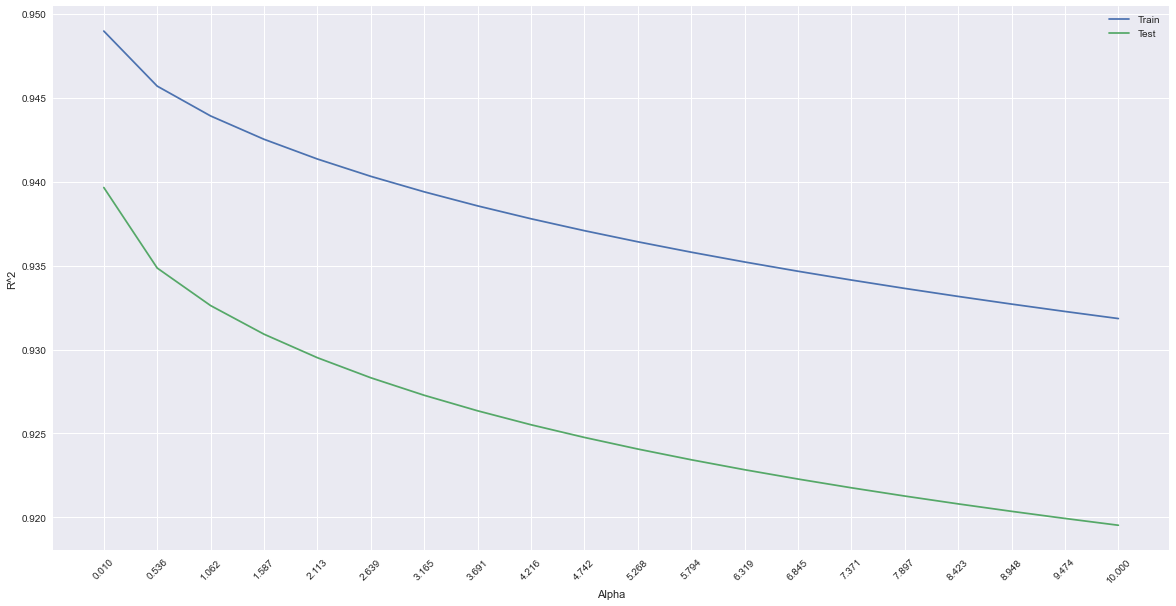

In [29]:
# # визуализируем R2 от alpha
fig, ax = plt.subplots(figsize=(20, 10)) #создаем фигуру + координатную плоскость
ax.plot(alpha_list, train_score, label='Train') # линейный график для тренировочной выборки
ax.plot(alpha_list, test_score, label='Test') # линейный график для тестовой выборки
ax.set_xlabel('Alpha') #название оси абсцисс
ax.set_ylabel('R^2') # название оси ординат
ax.set_xticks(alpha_list) # метка оси абсцисс
ax.xaxis.set_tick_params(rotation=45) #поворот меток на оси абсцисс
ax.legend(); # отображение легенды

Необходимо выбрать альфу, где наблюдается наибольшее значение тестовой выборки и разница между тренировочглй и тестовой линией наименьшая.
<br> В данном случае 0,01

Финальная модель

In [30]:
# произведем регуляризацию с alpha = 0.01
ridge_lr = linear_model.Ridge(alpha=0.01)
ridge_lr.fit(X_train_scaled_poly, y_train_log)
y_train_pred = np.exp(ridge_lr.predict(X_train_scaled_poly))
y_test_pred = np.exp(ridge_lr.predict(X_test_scaled_poly))

# выводим метрики
print_metrics(y_train, y_train_pred, y_test, y_test_pred)

Train R^2: 0.951
Train MAE: 1656.825
Train MAPE: 7.610


Test R^2: 0.937
Test MAE: 1772.183
Testt MAPE: 7.994


Визуализация ошибок

Text(0, 0.5, 'Model')

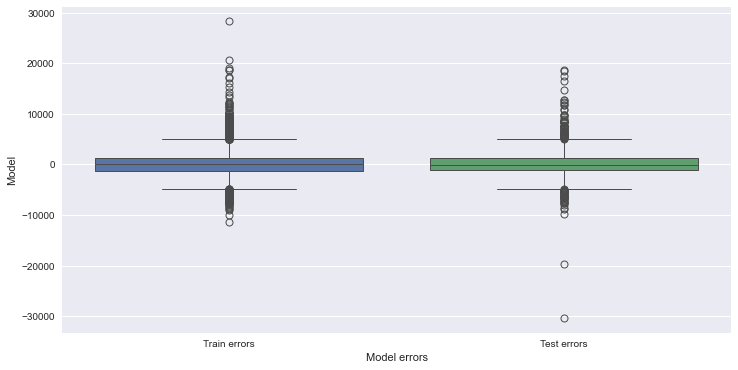

In [33]:
fig, ax = plt.subplots(figsize=(12, 6)) # фигура+координатная плоскость и размер

# ошибки на тренировочной выборке
y_train_errors = y_train - y_train_pred
# ошибки модели на тестовой выборке
y_test_error = y_test - y_test_pred

# преобразуем ошибки в Data Frame
predict_df = pd.DataFrame(
    {'Train errors': y_train_errors,
     'Test errors': y_test_error}
)

# Визуализируем ошибки через boxplot
sns.boxplot(data=predict_df, ax=ax)
ax.set_xlabel('Model errors') # название оси абсцисс
ax.set_ylabel('Model') # название оси ординат

Ошибки лежат около нуля на обоих выборках
<br> Межквартильный размах +/- 4000 $
<br> но есть выбросы в + или - 30 0000 $